# Dynamic Process: Robustness to the Belief Updating Parameter (C.1)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from poisson_approval import *

In [2]:
N_SAMPLES = 10000
N_MAX_EPISODES = 1000

In [3]:
update_ratios = {
    '1': 1,
    '0.5': 0.5,
    'one_over_log_log_t_plus_fourteen': one_over_log_log_t_plus_fourteen,
    'one_over_log_t_plus_one': one_over_log_t_plus_one,
    'one_over_sqrt_t': one_over_sqrt_t,
    'one_over_t': one_over_t, 
}

In [4]:
update_ratios_legend = {
    '1': '1',    
    '0.5': '0.5',
    'one_over_log_log_t_plus_fourteen': '1 / log(log(t + 14))',
    'one_over_log_t_plus_one': '1 / log(t + 1)',
    'one_over_sqrt_t': '1 / sqrt(t)',
    'one_over_t': '1 / t', 
}

In [5]:
rand_profile = RandProfileHistogramUniform(n_bins=1)

## Convergence Rate

In [6]:
table_cv = pd.DataFrame()
table_cv.index.name = 'Belief updating parameter'
d_update_ratio_name_results = {}
for update_ratio_name, update_ratio in update_ratios.items():
    results = monte_carlo_fictitious_play(
        factory=rand_profile,
        n_samples=N_SAMPLES,
        n_max_episodes=N_MAX_EPISODES,
        voting_rules=VOTING_RULES,
        init='random_tau',
        perception_update_ratio=update_ratio,
        monte_carlo_settings=[
            MCS_N_EPISODES,
            MCS_CONVERGES,
        ],
        file_save='sav/perception_update_%s.sav' % update_ratio_name,
    )
    d_update_ratio_name_results[update_ratio_name] = results
    for voting_rule in VOTING_RULES:
        table_cv.loc[update_ratio_name, voting_rule] = float(results[voting_rule]['mean_converges'])
table_cv

,Approval,Plurality,Anti-plurality
Belief updating parameter,,,
1,0.9387,1.0,0.0
0.5,0.9503,1.0,0.0
one_over_log_log_t_plus_fourteen,0.9483,1.0,0.0
one_over_log_t_plus_one,0.9497,1.0,0.0
one_over_sqrt_t,0.9468,1.0,0.0
one_over_t,0.0000,0.0,0.0


## Convergence Speed

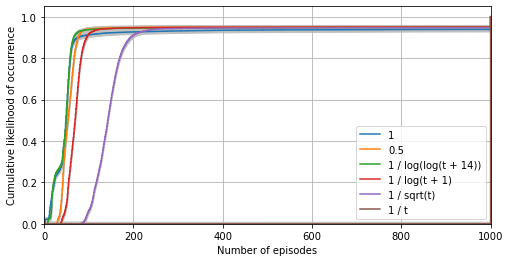

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
for update_ratio_name, update_ratio in update_ratios.items():
    plt_cdf(
        data=d_update_ratio_name_results[update_ratio_name]['Approval']['n_episodes'],
        weights=np.ones(N_SAMPLES) / N_SAMPLES,
        n_samples=N_SAMPLES,
        data_min=0,
        data_max=N_MAX_EPISODES,
        label=update_ratios_legend[update_ratio_name]
    )
plt.grid(True)
plt.legend()
plt.xlabel('Number of episodes')
plt.ylabel('Cumulative likelihood of occurrence')
plt.xlim(0, N_MAX_EPISODES)
plt.ylim(0, 1.05)
plt.savefig('img/fspeedCV_perception_update_ratio.png', dpi=600, bbox_inches="tight")